In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tesis_data_raw.csv')
df2 = pd.read_csv('tesis_data_raw_second.csv')
del df['Unnamed: 0']
del df2['Unnamed: 0']

C:\Users\Max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.concat([df, df2], axis=0)
len(df)

15982806

## Preprocesamiento de datos

In [4]:
df = df[df['created_at'].notna()]
print(df.created_at.min(), df.created_at.max())

2018-10-10 20:19:24+00:00 2022-07-14 00:00:00+00:00


In [5]:
df['time'] = pd.to_datetime(df['created_at'])

In [6]:
df = df.drop_duplicates(subset=['id'])
df = df[df['time'].notna()]

In [20]:
len(df)

14403362

In [21]:
df_date_filter = df[(df.time > '2021-08-10') & (df.time < '2021-10-31')]
len(df_date_filter)

1991956

In [29]:
df_date_filter.head(30).text.to_list()

['RT @tere_marinovic: Convencionales pidiendo más plata porque no les alcanza, y después diciendo que no están pidiendo más plata https://t.c…',
 'RT @HarryJurgensen: Las 1.128 ENMIENDAS presentadas a los REGLAMENTOS  en la CC, revelan el MAL trabajo de nuestras comisiones, al NO busca…',
 'RT @HarryJurgensen: Incorporamos en Reglamento, como VxCH, los temas: IGUALDAD ante la ley, LIBERTAD personal, SEGURIDAD individual y LIBER…',
 'RT @natigonzalez_b: Patricia si lo qué es inverosímil es que incluyeran la protección del resguardo de la semilla ancestral en las comision…',
 'RT @HarryJurgensen: ¡Qué LAMENTABLE!¿Razones?: 1) Ausencia republicana y falta de liderazgo 2) Conducción errática y amarrada a una sola id…',
 'RT @carlos81956718: Franco Parisi expone el Verdadero  motivo de por qué el Banco Central subió la tasa  de interes, escuchen Muy Bien.…',
 'RT @ZbigniewHoldys: Zróbcie #RT, proszę. Zróbmy choćby tyle, by powstrzymać kłamstwo i jego dalsze powielanie komentarzach, także ze

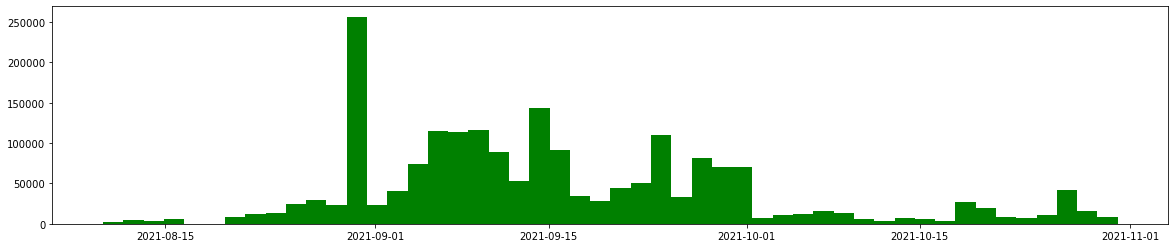

Wall time: 20.5 s


In [22]:
%%time
plt.figure(figsize=(20, 4))
plt.hist(df_date_filter['time'], bins = 50, color='green')
plt.show()

#### Filtros de texto

In [23]:
%%time
dic_screen = {}
for _, row in dataset.iterrows():
    user_id = row.user_id
    screen = row.screen_name
    if user_id not in dic_screen:
        dic_screen[screen] = user_id

NameError: name 'dataset' is not defined

In [24]:
%%time
# Esto crea un dataframe basado en los retweet de la forma usuario1 retweetea a usuario2
df_rt = df_date_filter[df_date_filter['text'].str.contains("RT @")]
rt_dict = {}
ls_pares = []
for _, row in df_rt.iterrows():
    txt = row['text'].split(':')[0]
    rt_user = txt.split('@')[-1]
    try:
        pair = sorted([row.screen_name, rt_user])
        if pair[0] != pair[1]:
            pair[0] = str(pair[0])
            pair[1] = str(pair[1])
            key = ' '.join(pair)
            ls_pares.append(pair[0] + " " + pair[1])
            if key not in rt_dict:
                rt_dict[key] = 0
            rt_dict[key] += 1
    except:
        pass
df_pares = pd.DataFrame(ls_pares, columns=['users'])

users_cant = df_pares.groupby('users').size().reset_index(name='counts')
df_cant_pares = users_cant[users_cant['counts'] > 0]
ls_users = []

df_usuarios = df_cant_pares['users'].str.split(' ', expand=True).rename({0: 'user1', 1: 'user2'}, axis=1)
df_usuarios.head()

Wall time: 1min 9s


,user1,user2,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,00001khk,No9_imokun,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,000023170916p,XIAOXlAO_______,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,000025NikO,realalpha20,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0000_HaHaHaHa,Aaaaeee_dldm,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,0000h,No9_imokun,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [25]:
df_usuarios = df_usuarios[['user1', 'user2']]

In [26]:
u1 = df_usuarios.user1.to_list()
u2 = df_usuarios.user2.to_list()
u = list(set(u1 + u2))
len(u)

178654

In [58]:
df_user_filter = df_date_filter[df_date_filter.screen_name.isin(u)]

In [60]:
df_user_filter.to_csv('tweets_tesis.csv', index=False)

## Rest

In [62]:
df = df_user_filter

In [61]:
def hashtags(dataset):
    hash_dic = {}
    for _, row in dataset.iterrows():
        text = row.text
        words = text.split(' ')
        ls_hashtags = []
        for w in words:
            try:
                if w[0] == '#':
                    ls_hashtags.append(w)
            except:
                pass
        for h in ls_hashtags:
            if h not in hash_dic:
                hash_dic[h] = 0
            hash_dic[h] += 1
    return hash_dic

def order_dic(dic_hashtags):
    for k in sorted(dic_hashtags, key=dic_hashtags.get, reverse=True):
        print(k, dic_hashtags[k])

### Maria Elisa Quinteros Presidencia (5 de Enero 2022)

In [118]:
meq = df[(df.created_at > '2022-01-05') & (df.created_at < '2022-01-12')]

In [119]:
meq = meq[meq.text.str.contains("Maria Elisa Quinteros|María Elisa Quinteros|MEQ")]

In [120]:
len(meq)

39482

In [121]:
meq.to_csv('Noticias/MEQ_tweets.csv', index=False)

### Borrador (Junio 2022)

In [123]:
borrado = df[(df.created_at > '2022-06-27') & (df.created_at < '2022-07-10')]

In [124]:
borrado = borrado[borrado.text.str.contains("borrador|Borrador")]

In [125]:
len(borrado)

9504

In [126]:
borrado.to_csv('Noticias/Borrador_tweets.csv', index=False)

### Fin del Senado (Mayo 2022)

In [127]:
senado = df[(df.created_at > '2022-04-12') & (df.created_at < '2022-04-20')]

In [128]:
senado = senado[senado.text.str.contains("Senado|senado")]

In [129]:
len(senado)

14604

In [130]:
senado.to_csv('Noticias/Senado_tweets.csv', index=False)

### Embarazo (Marzo 2022)

In [131]:
embarazo = df[(df.created_at > '2022-03-14') & (df.created_at < '2022-03-23')]

In [132]:
embarazo = embarazo[embarazo.text.str.contains("Aborto|aborto|interrupción voluntaria|interrupcion voluntaria|embarazo")]

In [133]:
len(embarazo)

8051

In [134]:
embarazo.to_csv('Noticias/Embarazo_tweets.csv', index=False)

In [ ]:
%%time
# Esto crea un dataframe basado en los retweet de la forma usuario1 retweetea a usuario2
df_rt = meq[meq['text'].str.contains("RT @")]
rt_dict = {}
ls_pares = []
for _, row in df_rt.iterrows():
    txt = row['text'].split(':')[0]
    rt_user = txt.split('@')[-1]
    try:
        pair = sorted([row.screen_name, rt_user])
        if pair[0] != pair[1]:
            pair[0] = str(pair[0])
            pair[1] = str(pair[1])
            key = ' '.join(pair)
            ls_pares.append(pair[0] + " " + pair[1])
            if key not in rt_dict:
                rt_dict[key] = 0
            rt_dict[key] += 1
    except:
        pass
df_pares = pd.DataFrame(ls_pares, columns=['users'])

users_cant = df_pares.groupby('users').size().reset_index(name='counts')
df_cant_pares = users_cant[users_cant['counts'] > 0]
ls_users = []

df_usuarios = df_cant_pares['users'].str.split(' ', expand=True).rename({0: 'user1', 1: 'user2'}, axis=1)
df_usuarios